In [1]:
using Yao

In [2]:
n=3
results = zero_state(n) |> repeat(n, H) |> r -> measure(r, nshots=1000)

1000-element Array{BitBasis.BitStr{3,Int64},1}:
 101 ₍₂₎
 010 ₍₂₎
 101 ₍₂₎
 000 ₍₂₎
 101 ₍₂₎
 010 ₍₂₎
 000 ₍₂₎
 111 ₍₂₎
 011 ₍₂₎
 010 ₍₂₎
 011 ₍₂₎
 001 ₍₂₎
 110 ₍₂₎
       ⋮
 010 ₍₂₎
 111 ₍₂₎
 110 ₍₂₎
 011 ₍₂₎
 111 ₍₂₎
 101 ₍₂₎
 111 ₍₂₎
 001 ₍₂₎
 111 ₍₂₎
 010 ₍₂₎
 100 ₍₂₎
 010 ₍₂₎

In [3]:
using BitBasis, Plots, StatsBase, LinearAlgebra
default(size=(400, 250))

@recipe function user_recipe(measurements::Array{BitStr{n,Int},1}) where n
    max = (1<<n)-1
    
    hist = fit(Histogram, Int.(measurements), 0:max+1)
    hist = normalize(hist, mode=:pdf)

    seriestype := :bar
    bins := max+1
    xticks --> (0:max)
    tick_direction --> :out
    xrotation --> 45
    xformatter --> y -> "|"*string(Int(y); base=2, pad=3)*">"
    legend --> :none

    hist.edges[1] .- 0.5, hist.weights
end

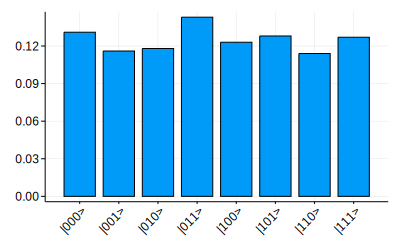

In [4]:
plot(results)

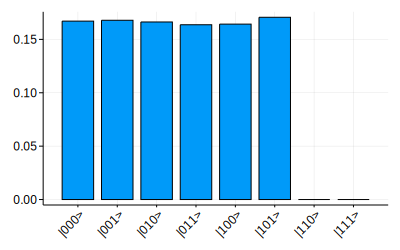

In [5]:
# Simple six-sided die using preselection
import YaoBlocks.ConstGate.P0

block = chain(4, 
    repeat(H, 1:3),
    control((2,3), 4=>X),
    put(4=>P0))

results = zero_state(4) |> block |> r -> focus!(r, 1:3) |> r -> measure(r, nshots=10000)
plot(results)